In [18]:
import pandas as pd
import numpy as np
import re
import time

pd.set_option('max.columns', 131)

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
df = pd.read_csv('raw_data_with_labels.csv', index_col=0)
df = df[df['y'].notnull()]
df.shape

(27, 4)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Changing _upload\_date_ to datetime type

In [4]:
df['upload_date'] = pd.to_datetime(df['upload_date'], format='%Y-%m-%d')
df_limpo = df.copy()
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        27 non-null     object        
 1   upload_date  27 non-null     datetime64[ns]
 2   view_count   27 non-null     int64         
 3   y            27 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
features = pd.DataFrame(index=df_limpo.index)
y = df['y'].copy()

In [8]:
features['tempo_desde_pub'] = (pd.to_datetime('2020-09-15') - df_limpo['upload_date']) / np.timedelta64(1, 'D')
features['views'] = df_limpo['view_count']
features['views_por_dia'] = features['views'] / features['tempo_desde_pub']
features = features.drop(['tempo_desde_pub'], axis=1)

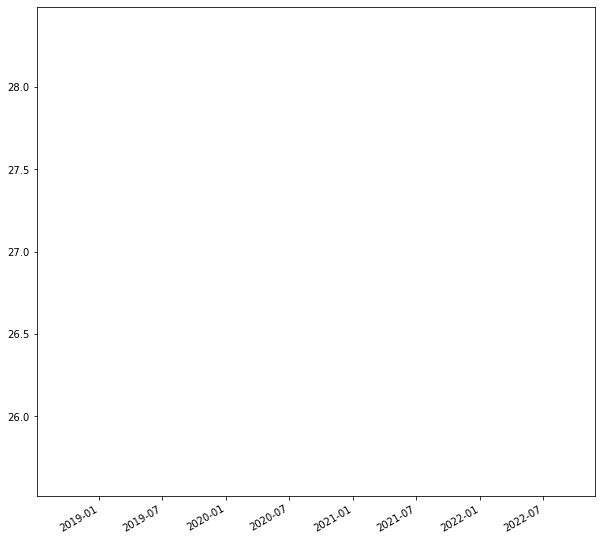

In [10]:
df_limpo['upload_date'].value_counts().plot(figsize=(10, 10))

In [ ]:
Xtrain, Xval = features[df_limpo['upload_date'] < '2019-04-01']